# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [0]:
!wget "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip"

--2019-02-24 13:44:39--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.33
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  20.9MB/s    in 53s     

2019-02-24 13:45:33 (20.3 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [0]:
!wget "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip"

--2019-02-24 13:45:35--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.20.13
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.20.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  20.2MB/s    in 10s     

2019-02-24 13:45:46 (18.5 MB/s) - ‘lfw.zip’ saved [196739509/196739509]



In [0]:
!unzip dogImages 

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg  
   creating: dogImages/test/002.Afghan_hound/
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00116.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan_ho

In [0]:
!unzip lfw && unzip files

Archive:  lfw.zip
   creating: lfw/
  inflating: lfw/.DS_Store           
   creating: __MACOSX/
   creating: __MACOSX/lfw/
  inflating: __MACOSX/lfw/._.DS_Store  
   creating: lfw/Aaron_Eckhart/
  inflating: lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: __MACOSX/lfw/Aaron_Eckhart/
  inflating: __MACOSX/lfw/Aaron_Eckhart/._Aaron_Eckhart_0001.jpg  
  inflating: __MACOSX/lfw/._Aaron_Eckhart  
   creating: lfw/Aaron_Guiel/
  inflating: lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg  
   creating: __MACOSX/lfw/Aaron_Guiel/
  inflating: __MACOSX/lfw/Aaron_Guiel/._Aaron_Guiel_0001.jpg  
  inflating: __MACOSX/lfw/._Aaron_Guiel  
   creating: lfw/Aaron_Patterson/
  inflating: lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg  
   creating: __MACOSX/lfw/Aaron_Patterson/
  inflating: __MACOSX/lfw/Aaron_Patterson/._Aaron_Patterson_0001.jpg  
  inflating: __MACOSX/lfw/._Aaron_Patterson  
   creating: lfw/Aaron_Peirsol/
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
   creating: __MACOSX/lfw/Aa

In [122]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*")) # /* defines the level of folders the glob should enter
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [0]:
dog_files

array(['dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08144.jpg',
       'dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08176.jpg',
       'dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08151.jpg',
       ..., 'dogImages/test/098.Leonberger/Leonberger_06578.jpg',
       'dogImages/test/098.Leonberger/Leonberger_06609.jpg',
       'dogImages/test/098.Leonberger/Leonberger_06617.jpg'], dtype='<U99')

In [0]:
human_files

array(['lfw/Kristin_Scott_Thomas/Kristin_Scott_Thomas_0001.jpg',
       'lfw/Benjamin_Bratt/Benjamin_Bratt_0001.jpg',
       'lfw/Sam_Torrance/Sam_Torrance_0001.jpg', ...,
       'lfw/Margaret_Thatcher/Margaret_Thatcher_0001.jpg',
       'lfw/Rohman_al-Ghozi/Rohman_al-Ghozi_0001.jpg',
       'lfw/Jose_Luis_Chilavert/Jose_Luis_Chilavert_0001.jpg'],
      dtype='<U84')

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [125]:
!unzip haarcascades

Archive:  haarcascades.zip
   creating: haarcascades/
  inflating: haarcascades/haarcascade_frontalface_alt.xml  


Number of faces detected: 1


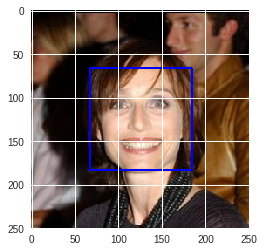

In [126]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    if (len(faces) > 0):
      return True
    
    else:
      return False

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [0]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
total_images = len(human_files_short)
num_Humans = 0
num_Hum_Dogs = 0
num_no_Human_humData = []
num_no_Human_dogData = []
for i in range(total_images):
  if (face_detector(human_files_short[i]) == True):
    num_Humans += 1
  else:
    num_no_Human_humData.append(human_files_short[i])
    
  if (face_detector(dog_files_short[i]) == True):
    num_Hum_Dogs += 1
    num_no_Human_dogData.append(dog_files_short[i])
    
    
print("There is/are ", num_Humans, "Human(s), which is ", (num_Humans/total_images)*100, "% of the Human dataset")
print("There is/are ", num_Hum_Dogs, "Human(s), which is ", (num_Hum_Dogs/total_images)*100, "% of the Dog dataset")

There is/are  99 Human(s), which is  99.0 % of the Human dataset
There is/are  11 Human(s), which is  11.0 % of the Dog dataset


NB: I went further to visuallize the wrong predictions

Number of faces detected: 0


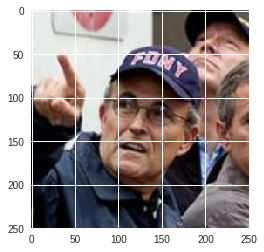

In [0]:
# Lets view the only image that does not have a human face in the human dataset
# load color (BGR) image
img2 = cv2.imread(num_no_Human_humData[0])
# convert BGR image to grayscale
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# find faces in image
faces2 = face_cascade.detectMultiScale(gray2)

# print number of faces detected in the image
print('Number of faces detected:', len(faces2))

# get bounding box for each detected face
for (x,y,w,h) in faces2:
    # add bounding box to color image
    cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb2)
plt.show()


This shows that the pretrained model is not very accurate on predicting the above data on the human dataset

Number of faces detected: 1


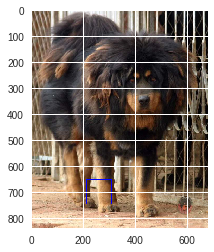

In [0]:
# Lets view the only image that does not have a human face in the human dataset
# load color (BGR) image
img3 = cv2.imread(num_no_Human_dogData[4])
# convert BGR image to grayscale
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# find faces in image
faces3 = face_cascade.detectMultiScale(gray3)

# print number of faces detected in the image
print('Number of faces detected:', len(faces3))

# get bounding box for each detected face
for (x,y,w,h) in faces3:
    # add bounding box to color image
    cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb3)
plt.show()


It is obvious that this classifer does not do well in prediction

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [0]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
553433881it [00:06, 90815765.27it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    expects_means = [0.485, 0.456, 0.406]
    expects_std = [0.229, 0.224, 0.225]
    
    # Lets make sure the images are RGB
    image = Image.open(img_path).convert("RGB")
    
    pred_transforms = transforms.Compose([transforms.Resize(256),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize(expects_means, expects_std)])
    image = pred_transforms(image)
    
    #move VGG16 to CPU
    VGG16.cpu()
    
    ## Return the *index* of the predicted class for that image
    VGG16.eval()
    
    image = image.unsqueeze(0)
    
    with torch.no_grad():
      output = VGG16.forward(image)
      _, pred = torch.max(output, 1)
    
    return pred 
  # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
  prediction = VGG16_predict(img_path)
  if (prediction > 150 and prediction < 269):
    return True
  else:
    return False
    ## TODO: Complete the function.
    ## OR
#     prediction = VGG16_predict(img_path)
#     dog_list = [x for x in range(151, 269)]
#     return predict in dog_list # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [0]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
total_images2 = len(human_files_short)
num_Humans2 = 0
num_Hum_Dogs2 = 0
# num_no_Human_humData2 = []
# num_no_Human_dogData2 = []
for i in range(total_images2):
  if (dog_detector(human_files_short[i]) == True):
    num_Humans2 += 1
#   else:
#     num_no_Human_humData2.append(human_files_short[i])
    
  if (dog_detector(dog_files_short[i]) == True):
    num_Hum_Dogs2 += 1
#     num_no_Human_dogData2.append(dog_files_short[i])
    
    
print("There is/are ", num_Humans2, "Dog(s), which is ", (num_Humans2/total_images2)*100, "% of the Human dataset")
print("There is/are ", num_Hum_Dogs2, "Dog(s), which is ", (num_Hum_Dogs2/total_images2)*100, "% of the Dog dataset")


There is/are  0 Dog(s), which is  0.0 % of the Human dataset
There is/are  100 Dog(s), which is  100.0 % of the Dog dataset


From the 100 images i selected f prediction from the human dataset and dog dataset, the following where observed.

- There are Zero Dogs in the Human Dataset and
- There are 100% (100 counts) Dogs in the dog dataset

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)!

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
!ls dogImages/

test  train  valid


In [0]:
import os
from torchvision import transforms
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
ROOT_DIR = "dogImages/"
TRAIN_DIR = ROOT_DIR + "train"
TEST_DIR = ROOT_DIR + "test"
VALID_DIR = ROOT_DIR + "valid"
## Specify appropriate transforms, and batch_sizes

data_transform = {
    "train": transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(45),
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])]),
    "test": transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])]),
    "valid": transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])]),
     
}
    
dataset = {"train": datasets.ImageFolder(root=TRAIN_DIR, transform=data_transform["train"]),
           "test": datasets.ImageFolder(root=TEST_DIR, transform=data_transform["test"]),
           "valid": datasets.ImageFolder(root=VALID_DIR, transform=data_transform["valid"])
}
loaders_scratch = {"train": torch.utils.data.DataLoader(dataset["train"], batch_size=16, shuffle=True, num_workers=4),
                   "test": torch.utils.data.DataLoader(dataset["test"], batch_size=16),
                   "valid": torch.utils.data.DataLoader(dataset["valid"], batch_size=16)
}



**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- My code resized the image by cropping. I cropped the image to a size of 224 and this is because, the input sensor usually used for imagenet pretrained models is usally 224. 
- Yes, i augumented the dataset with a horizontal flip and rotation of 45deg. This will make my model detect dogs when the image is presented in an unconventional way.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

NOTE: the input parameters to the conv2d are nn.conv2d( input_channel, desired_outputchannel, filter_size)

In [0]:
#Firstly, lets check the number of classes present for training
lent = os.listdir(TRAIN_DIR)
len(lent)

133

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # Note, the pooling layer is used to reduce the size of the image and not the convolution (strides and padding)
        # convolutional layer (sees 224x224x3 image tensor after maxpooling with stride of 2. ie see below)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # output image is of size 224
        # convolutional layer (sees 112x112x16 tensor after maxpooling with filter of 2 and stride of 2. ie see below)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) 
        # convolutional layer (sees 56x56x32 tensor after maxpooling with filter of 2 and stride of 2. ie see below)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) 
        # convolutional layer (sees 28x28x64 tensor after maxpooling with filter of 2 and stride of 2. ie see below)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # convolutional layer (sees 14x14x128 tensor after maxpooling with filter of 2 and stride of 2. ie see below)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        # For this layer, i will use a max pool filter of size 2 and stride of 3. the output is a 5 x 5 image.
        
        ## Lets define the max pooling layers nn.MaxPool2d(filter_Size, strides)
        
        self.maxpool1 = nn.MaxPool2d(2, 2)
        self.maxpool2 = nn.MaxPool2d(2, 3)
        
        ## Lets define the fully connected layer
        
        # linear layer (256 * 5 * 5 -> 2048) # the output from the conv layer is 256
        self.fc1 = nn.Linear(256 * 5 * 5, 2048) # the 5 x 5 image is a result of the last conv layer and max pool
        # linear layer (2048 -> 1024)
        self.fc2 = nn.Linear(2048, 1024)
        # linear layer (1024 -> 500)
        self.fc3 = nn.Linear(1024, 500)
        # linear layer (500 -> 133)
        self.fc4 = nn.Linear(500, 133)
        # my final output is 133 we have 133 classes
        
        ## Lets define the dropout layer
        
        self.dropout = nn.Dropout(0.25)
        
        ## Lets define the batch normalization for the conv layer and fully connected layer
        
        self.conv1_bn = nn.BatchNorm2d(16)
        self.conv2_bn = nn.BatchNorm2d(32)
        self.conv3_bn = nn.BatchNorm2d(64)
        self.conv4_bn = nn.BatchNorm2d(128)
        self.conv5_bn = nn.BatchNorm2d(256)
        
        self.fc1_bn = nn.BatchNorm1d(2048)
        self.fc2_bn = nn.BatchNorm1d(1024)
        self.fc3_bn = nn.BatchNorm1d(500)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.maxpool1(F.relu(self.conv1_bn(self.conv1(x))))
        x = self.maxpool1(F.relu(self.conv2_bn(self.conv2(x))))
        x = self.maxpool1(F.relu(self.conv3_bn(self.conv3(x))))
        x = self.maxpool1(F.relu(self.conv4_bn(self.conv4(x))))
        x = self.maxpool2(F.relu(self.conv5_bn(self.conv5(x))))
        
        # flatten image input
        x = x.view(-1, 256 * 5 * 5)
        
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1_bn(self.fc1(x)))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2_bn(self.fc2(x)))
        # add dropout layer
        x = self.dropout(x)
        # add 3rd hidden layer, with relu activation function
        x = F.relu(self.fc3_bn(self.fc3(x)))
        # add dropout layer
        x = self.dropout(x)
        # add 4th hidden layer
        x = self.fc4(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [0]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (maxpool2): MaxPool2d(kernel_size=2, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6400, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1,

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

- The first step i took was to define the convolution layers and calculate my desired output image size. In my case, i maintained the input image size into the conv layer by using a padding and stride of 1.
- The second step was to define a maxpooling filter that would reduces the size of the images by selecting the max pixel value for a pooling action. It also enables faster training.
- The third step i took was to define a batch normalizer for each layer. It generally improves the performace of the model
- The fourth step was to define a random dropout with an probability of 0.25. I feel is helps reduce overfitting and generalizes the model
- The fifth step was to construct the feed forward process using the function i had defined in step 1 - 4

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data) # feed forward 
            loss = criterion(output, target) # find the loss
            loss.backward() # back propagation
            optimizer.step() # weight updating
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss <= valid_loss_min):
          print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
              valid_loss_min,
              valid_loss))
          
          torch.save(model.state_dict(), save_path)
          # valid_loss_min to latest minimum
          valid_loss_min = valid_loss
            
    # return trained model
    return model

In [0]:
# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

In [0]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [0]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.503975


Test Accuracy: 15% (132/836)


The test accuracy after training with a learning rate of 0.01 and 10 epoch is 15%

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy() # data loader from the previous step

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [0]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# First step is to choose and download the pretrained model. I will use VGG6
model_transfer = models.vgg16(pretrained=True)

# next, we freeze the VGG parameters or weights because we only want to optimize the target image and prevent back-prop on the parameters
for param in model_transfer.parameters():
  param.requires_grad_(False)

# Lets see what the architecture looks like
model_transfer.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [0]:
# Building my own full connected layers
classifier = nn.Sequential(
        nn.Linear(25088, 4096),
        nn.ReLU(),
        nn.Dropout(p=0.15),
        nn.Linear(4096, 1000),
        nn.ReLU(),
        nn.Dropout(p=0.15),
        nn.Linear(1000, 133),
        # LogSoftmax is needed by NLLLoss criterion
        nn.LogSoftmax(dim=1))

# Replace classifier
model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

In [0]:
model_transfer.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.15)
  (3): Linear(in_features=4096, out_features=1000, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.15)
  (6): Linear(in_features=1000, out_features=133, bias=True)
  (7): LogSoftmax()
)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
- The first step i took was to visualize the structure of the vgg network and the "key" *(classifer)* for the first layer of the fully connected layer.
- With that, i was able to build my own fully connected layer to have an input size equal to the output of the conv layer for vgg16; I also assigned my new fully connected layer to the "key" *(classifer)* in the vgg network.
- I made the output size of my full connected layer to be equal to the number of classes of dogs

Sequential(

  (0): Linear(in_features=25088, out_features=4096, bias=True)
  
  (1): ReLU()
  
  (2): Dropout(p=0.15)
  
  (3): Linear(in_features=4096, out_features=1000, bias=True)
  
  (4): ReLU()
  
  (5): Dropout(p=0.15)
  
  (6): Linear(in_features=1000, out_features=133, bias=True)
  
  (7): LogSoftmax()
)


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [0]:
# train the model
n_epochs = 30
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.614828 	Validation Loss: 0.443309
Validation loss decreased (inf --> 0.443309).  Saving model ...
Epoch: 2 	Training Loss: 0.636528 	Validation Loss: 0.433667
Validation loss decreased (0.443309 --> 0.433667).  Saving model ...
Epoch: 3 	Training Loss: 0.644055 	Validation Loss: 0.448188
Epoch: 4 	Training Loss: 0.644128 	Validation Loss: 0.439549
Epoch: 5 	Training Loss: 0.611287 	Validation Loss: 0.431622
Validation loss decreased (0.433667 --> 0.431622).  Saving model ...
Epoch: 6 	Training Loss: 0.615768 	Validation Loss: 0.459696
Epoch: 7 	Training Loss: 0.642148 	Validation Loss: 0.478677
Epoch: 8 	Training Loss: 0.601513 	Validation Loss: 0.449444
Epoch: 9 	Training Loss: 0.616647 	Validation Loss: 0.459368
Epoch: 10 	Training Loss: 0.580646 	Validation Loss: 0.486256
Epoch: 11 	Training Loss: 0.582864 	Validation Loss: 0.493415
Epoch: 12 	Training Loss: 0.579538 	Validation Loss: 0.493779
Epoch: 13 	Training Loss: 0.594837 	Validation Loss: 0.527941
E

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [0]:
# call test function
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.521653


Test Accuracy: 86% (724/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [55]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].classes]

class_names[:10]

AttributeError: ignored

In [93]:
# Alternative
import os

# directory_list = list()
# for root, dirs, files in os.walk(TRAIN_DIR, topdown=True):
#     for name in dirs:
# #         directory_list.append(os.path.join(root, name))
#           directory_list.append(name[4:].replace("_", " "))
  

# class_names = directory_list
# print (class_names[:10])
files = []
files = [f[4:].replace("_", " ") for f in sorted(os.listdir(TRAIN_DIR))]

class_names = files
class_names[:10]

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog']

In [0]:
from PIL import Image
import torchvision.transforms as transforms

def load_and_process_image(img_path):
  image = Image.open(img_path).convert('RGB')
  prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                 std=[0.229, 0.224, 0.225])])
  # discard the transparent, alpha channel (ie :3) and add the batch dimension
  image = prediction_transform(image)[:3,:,:].unsqueeze(0)
  return image

In [0]:
def predict_breed_transfer(img_path, model, class_names):
    # load the image and return the predicted breed
    img = load_and_process_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

In [104]:
!unzip images

Archive:  images.zip
   creating: images/
  inflating: images/American_water_spaniel_00648.jpg  
  inflating: images/Brittany_02625.jpg  
  inflating: images/Curly-coated_retriever_03896.jpg  
  inflating: images/Labrador_retriever_06449.jpg  
  inflating: images/Labrador_retriever_06455.jpg  
  inflating: images/Labrador_retriever_06457.jpg  
  inflating: images/sample_cnn.png   
  inflating: images/sample_dog_output.png  
  inflating: images/sample_human_output.png  
  inflating: images/Welsh_springer_spaniel_08203.jpg  


In [105]:
for image_file in os.listdir("./images"):
  img_path = os.path.join('./images', image_file)
  prediction = predict_breed_transfer(img_path, model_transfer, class_names)
  print("image_file_name: ", img_path, "\t is predicted to be a ", prediction)

image_file_name:  ./images/sample_dog_output.png 	 is predicted to be a  Smooth fox terrier
image_file_name:  ./images/Labrador_retriever_06457.jpg 	 is predicted to be a  Labrador retriever
image_file_name:  ./images/American_water_spaniel_00648.jpg 	 is predicted to be a  American water spaniel
image_file_name:  ./images/Curly-coated_retriever_03896.jpg 	 is predicted to be a  Curly-coated retriever
image_file_name:  ./images/Labrador_retriever_06455.jpg 	 is predicted to be a  Labrador retriever
image_file_name:  ./images/Brittany_02625.jpg 	 is predicted to be a  Brittany
image_file_name:  ./images/sample_human_output.png 	 is predicted to be a  Beauceron
image_file_name:  ./images/sample_cnn.png 	 is predicted to be a  Icelandic sheepdog
image_file_name:  ./images/Welsh_springer_spaniel_08203.jpg 	 is predicted to be a  Irish red and white setter
image_file_name:  ./images/Labrador_retriever_06449.jpg 	 is predicted to be a  Labrador retriever


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

def run_app(img_path):
  image = Image.open(img_path)
  plt.imshow(image)
  plt.show()
  if dog_detector(img_path) == True:
    prediction = predict_breed_transfer(img_path, model_transfer, class_names)
    print("This is a ", prediction, " dog")
  elif face_detector(img_path) > 0:
    prediction = predict_breed_transfer(img_path, model_transfer, class_names)
    print("This is a Human that look like a ", prediction, " dog")
  else:
    print("Sorry, I dont know what is in the image")
    ## handle cases for a human face, dog, and neither
    


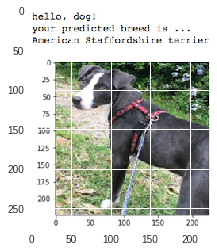

This is a  Smooth fox terrier  dog


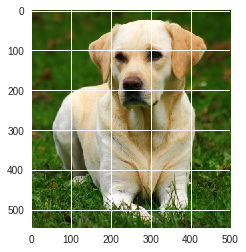

This is a  Labrador retriever  dog


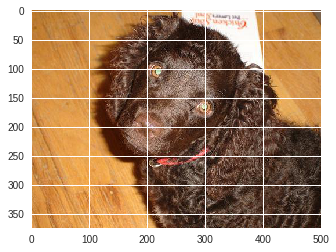

This is a  American water spaniel  dog


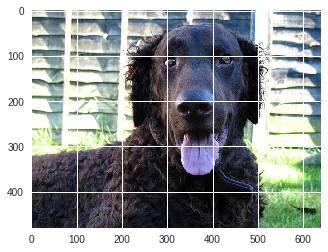

This is a  Curly-coated retriever  dog


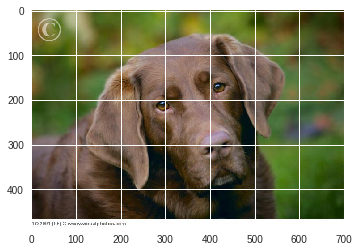

This is a  Labrador retriever  dog


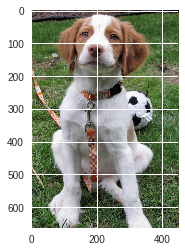

This is a  Brittany  dog


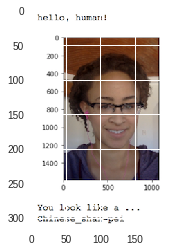

This is a Human that look like a  Beauceron  dog


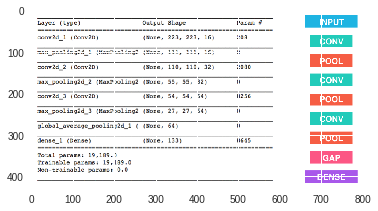

Sorry, I dont know what is in the image


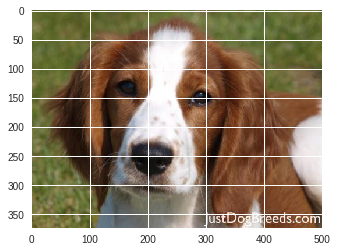

This is a  Irish red and white setter  dog


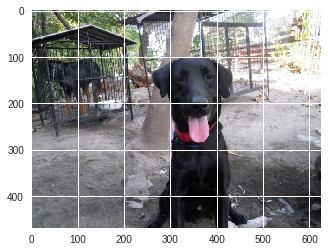

This is a  Labrador retriever  dog


In [129]:
for img_file in os.listdir("./images"):
  img_path = os.path.join("./images", img_file)
  run_app(img_path)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

- The output is better.
- I feel is should train the model longer to attain a better accuracy because i noticed few wrongly classified images.


In [113]:
!unzip dogapp

Archive:  dogapp.zip
   creating: Saved Pictures/
  inflating: Saved Pictures/1.png    
  inflating: Saved Pictures/2.jpg    
  inflating: Saved Pictures/3.jpg    
  inflating: Saved Pictures/4.jpg    
  inflating: Saved Pictures/5.png    
  inflating: Saved Pictures/6.jpg    
  inflating: Saved Pictures/desktop.ini  


In [0]:
dog_files = ["./Saved Pictures/2.jpg", "./Saved Pictures/3.jpg", "./Saved Pictures/6.jpg"]
human_files = ["./Saved Pictures/1.png", "./Saved Pictures/4.jpg", "./Saved Pictures/5.png"]

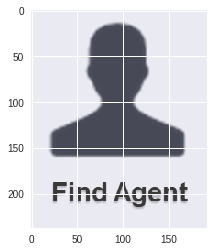

Sorry, I dont know what is in the image


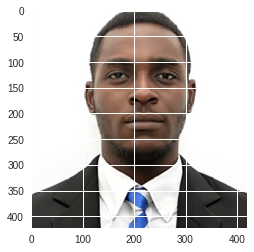

This is a Human that look like a  Basenji  dog


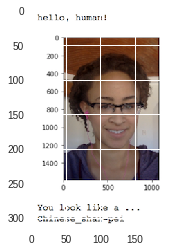

This is a Human that look like a  Beauceron  dog


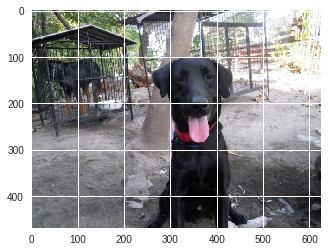

This is a  Labrador retriever  dog


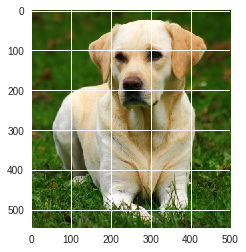

This is a  Labrador retriever  dog


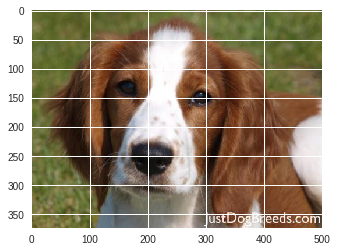

This is a  Irish red and white setter  dog


In [134]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)